# Visualisasi

In [1]:
# ini untuk data handling, import, cleaning, ...
import numpy as np
import pandas as pd

# ini untuk visualisasi
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# import datanya, data imigrasi Canada
df_can = pd.read_excel("dataset/Canada.xlsx", skiprows=20, sheet_name="Canada by Citizenship", skipfooter=2)
print(df_can.shape)
display(df_can.head())
display(df_can.tail())

(195, 43)


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [3]:
# ekplorasi data
# buat judul kolom yang string biar tidak error di versi pandas yang lama
column_str = []
for c in df_can.columns:
    column_str.append(str(c))

df_can_copy = df_can.copy()
df_can_copy.columns = column_str

df_can_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [4]:
# lihat dulu list kolom nya
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [5]:
# kita ganti nama kolom biar lebih mudah dibaca
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [6]:
# kita juga hapus kolom2 yang tidak kita pakai
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [7]:
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [8]:
# untuk memudahkan ambil data kolom 1980-2013
years = range(1980, 2014)

In [9]:
# kita tambahkan juga satu kolom untuk total imigrasi sebuah negara ke Canada di tahun 1980-2013
df_can['Total'] = df_can.sum(axis=1)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [10]:
# pakai describe untuk melihat data2 statistik
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [11]:
# kita gunakan Country sebagai index biar lebih berguna
df_can.set_index('Country', inplace=True)

# misal kita mau ambil data Imigradi Indonesia
# df_can[df_can['Country'] == 'Indonesia'][2010]

# kalau country jadi index, kita tinggal minta
df_can.loc['Indonesia', [2010, 2011]]

2010    712
2011    390
Name: Indonesia, dtype: object

In [12]:
# bandingin imigrasi 2010 dan 2012, antara Indonesia dan Singapore
df_can.loc[['Indonesia', 'Singapore'], [2010, 2012]]

,2010,2012
Country,,
Indonesia,712,395
Singapore,805,146


# Jenis Visualisasi
- Line Plot
- Area Plot
- Bar Chart
- Pie Chart
- Box plot
- Histogram
- Scatter Plot

# Line Plot
### Buat Visualisasi dengan line plot untuk imigrasi Indonesia dan Singapore

In [13]:
df_insg = df_can.loc[['Indonesia', 'Singapore'], years]
df_insg

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387
Singapore,241,301,337,169,128,139,205,372,808,1269,...,311,392,298,690,734,366,805,219,146,141


<AxesSubplot:xlabel='Country'>

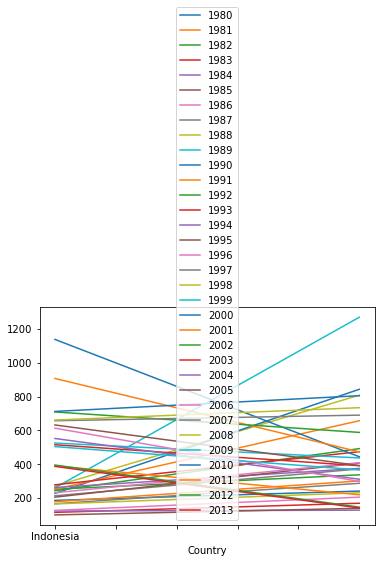

In [14]:
df_insg.plot()

axis yang di plot terbalik, jadi kita gunakan transpose untuk membalik axis nya, x jadi y, y jadi x

<AxesSubplot:>

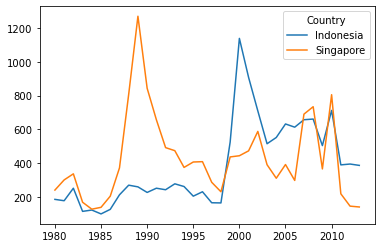

In [15]:
df_insg = df_insg.T
df_insg.plot()

untuk membuat plot dengan style berbeda, bisa lihat style yang ada di https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html   
kemudian menulis `mpl.style.use(['nama_style'])`

In [16]:
# contoh, pakai style ggplot
mpl.style.use(['ggplot'])

<AxesSubplot:>

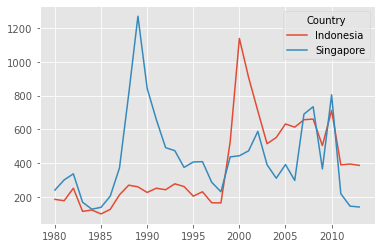

In [17]:
df_insg.plot()

Text(2000.5, 1120, 'puncak event di Indonesia')

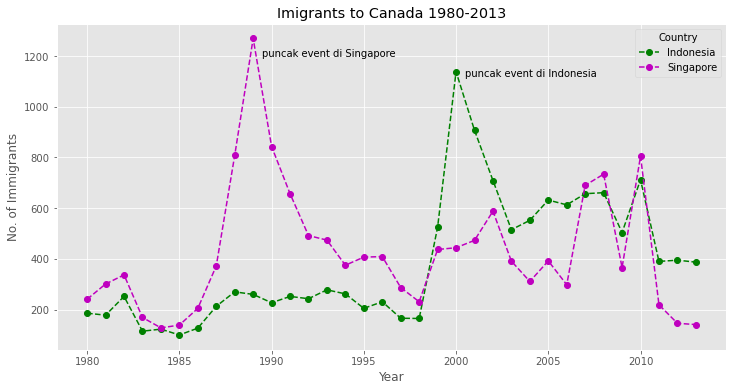

In [18]:
# kita bisa tambahkan opsi opsi dan juga anotasi ke plot ini
df_insg.plot(figsize=(12,6), marker='o', color=['g', 'm'], linestyle='--')

#anotasi
plt.xlabel('Year')
plt.ylabel('No. of Immigrants')
plt.title('Imigrants to Canada 1980-2013')

plt.text(1989.5, 1200, 'puncak event di Singapore')
plt.text(2000.5, 1120, 'puncak event di Indonesia')

opsi opsi yang bisa digunakan untuk membuat variasi line plot bisa dilihat di https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

# Area Plot
nama lainnya adalah stacked line plot, line plot yang bertumpuk. data di area plot bisa kita "tumpuk" untuk mendapat sebuah total, secara y-axis (2D) ataupun secara z-axis (3D).

### cari 3 negara dengan jumlah imigrasi terbanyak dan buat area plot nya

In [19]:
# cari 3 negara dengan jumlah imigrasi terbanyak
df_can['Total']

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

In [20]:
df_top3 = df_can.sort_values(['Total'], axis=0, ascending=False).head(3)
df_top3

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500


In [21]:
# ambil kolom years saja
df_top3 = df_top3[years]
df_top3

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827


In [22]:
# di transpose supaya x-axis adalah tahun tahun
df_top3 = df_top3.T

<AxesSubplot:>

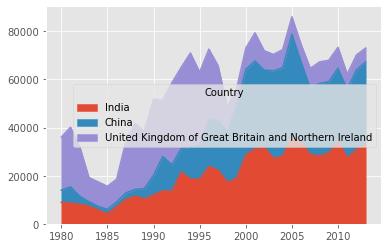

In [23]:
# plot dengan opsi tipe area
df_top3.plot(kind='area')

Text(0.5, 0, 'Years')

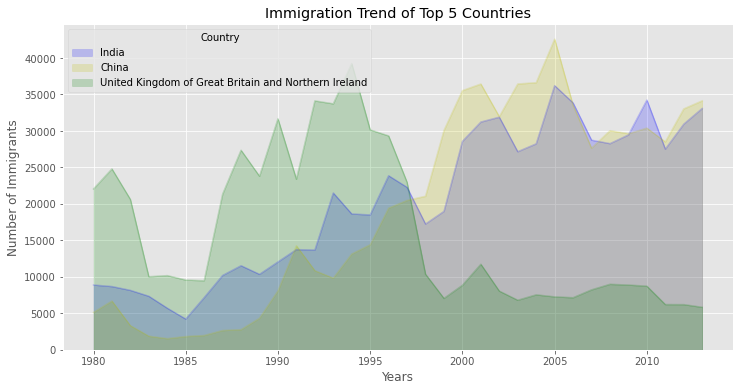

In [24]:
# kita tambahkan opsi supaya graph lebih terlihat
df_top3.plot(kind='area', # membuat plot tipe area
             figsize=(12,6), # ukuran graph
             stacked=False, # kalau False, tidak ditumpuk secara y-axis,
             alpha=0.2, # level transparansi 20%
             color=['b', 'y', 'g'] # custom warna
            )

# title dan label axis, menggunakan scripting layer
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

menambahkan label axis, judul, dan text menggunakan plt namanya "scripting layer". Kita juga bisa menambahkan text dengan "artist layer"

Text(0.5, 1.0, 'top 3 Countries by Immigration')

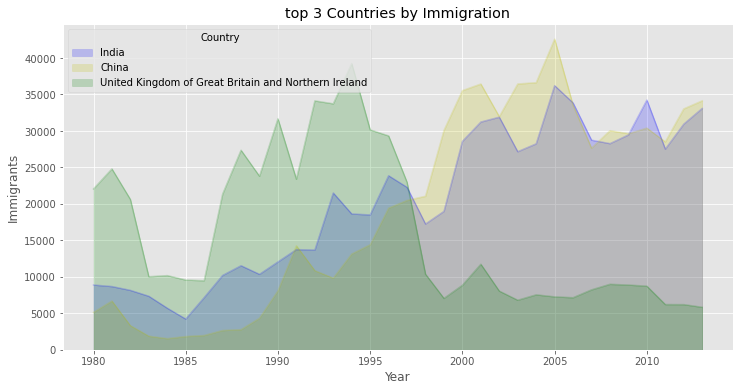

In [25]:
# contoh artist layer
plot_top3 = df_top3.plot(kind='area', # membuat plot tipe area
                         figsize=(12,6), # ukuran graph
                         stacked=False, # kalau False, tidak ditumpuk secara y-axis,
                         alpha=0.2, # level transparansi 20%
                         color=['b', 'y', 'g'] # custom warna
                        )

plot_top3.set_ylabel("Immigrants")
plot_top3.set_xlabel("Year")
plot_top3.set_title("top 3 Countries by Immigration")

# Bar Chart
mirip line plot, tapi pakai bar, tidak pakai garis atau titik

### cari data imigrasi Iceland 1980-2013 dan perhatikan efek Financial Crisis di tahun 2008-2011

In [26]:
s_ice = df_can.loc['Iceland', years]
s_ice

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

<AxesSubplot:>

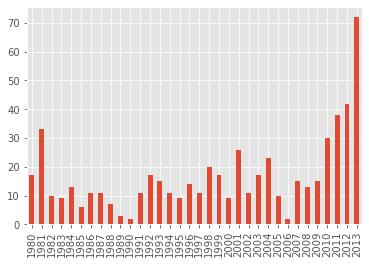

In [27]:
# plot tipe bar
s_ice.plot(kind='bar')

Text(28, 30, '2008-2011 Financial Crisis')

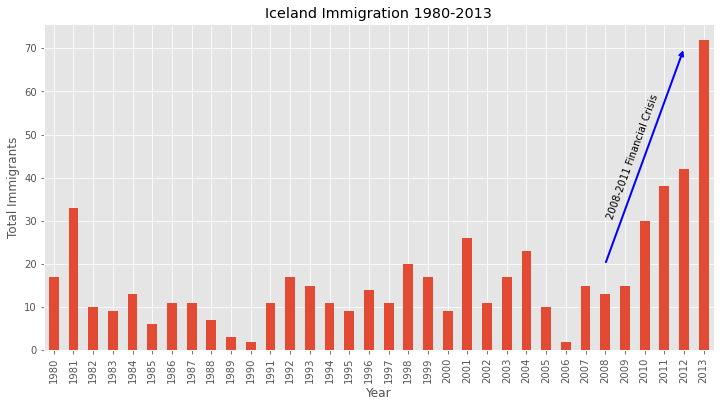

In [28]:
# plot bar dengan opsi biar menarik
p_ice = s_ice.plot(kind='bar', 
                   figsize=(12,6))

# tambah judul, label axis
p_ice.set_title("Iceland Immigration 1980-2013")
p_ice.set_ylabel("Total Immigrants")
p_ice.set_xlabel("Year")

# tambah notes kalau ada Financial Crisis di tahun 2008-2011            
# untuk panahnya
p_ice.annotate('',              # kosong karena ini panah bukan text
               xy=(32,70),      # titik akhir panah, atau kepala panah yang > tajamnya
               xytext=(28,20),  # titik lokasi buntut panah
               xycoords='data', # menggunakan data sebagai koordinat titik
               arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3', 'color': 'blue', 'lw': 2}
              )

# untuk text miring di atas panahnya
p_ice.annotate('2008-2011 Financial Crisis', # text
               xy=(28,30),                   # lokasi mulai text
               rotation = 70,                # rotasi
               va='bottom',                  # vertical align
               ha='left'                     # horizontal align
              )

In [29]:
dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)

{'arrowstyle': '->', 'connectionstyle': 'arc3', 'color': 'blue', 'lw': 2}

Text(0.5, 0, 'Total Imigran')

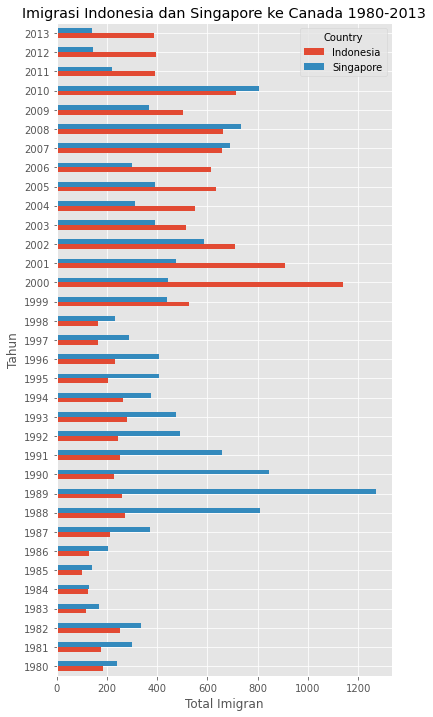

In [30]:
# horizontal bar chart bisa dibuat dengan opsi kind='barh'
# pakai contoh data imigrasi Indonesia dan Singapore df_insg
df_insg.plot(kind='barh', figsize=(6, 12))
plt.title("Imigrasi Indonesia dan Singapore ke Canada 1980-2013")
plt.ylabel("Tahun")
plt.xlabel("Total Imigran")

# Pie Chart
biasanya digunakan untuk summary cepat, perbandingan antara beberapa kategori saja (max 8)
### bandingkan total imigrasi dari setiap benua

In [31]:
df_can['Continent'].value_counts()
# dari 6 benua, kita bentuk 1 pie chart, untuk total imigrasi per benua

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: Continent, dtype: int64

In [32]:
# group by continent, lalu ambil kolom Total saja, baru di gabung jadi satu sum per continent
s_total_continent = df_can.groupby(['Continent'])['Total'].sum()
s_total_continent

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

<AxesSubplot:ylabel='Total'>

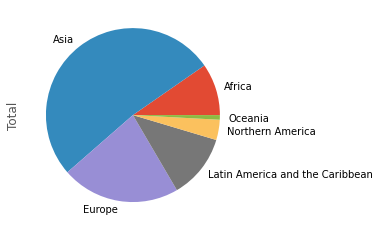

In [33]:
# buat pie chart nya
s_total_continent.plot(kind='pie')

(-1.1107545164204682,
 1.1260912315394227,
 -1.116322949556276,
 1.2578626753223967)

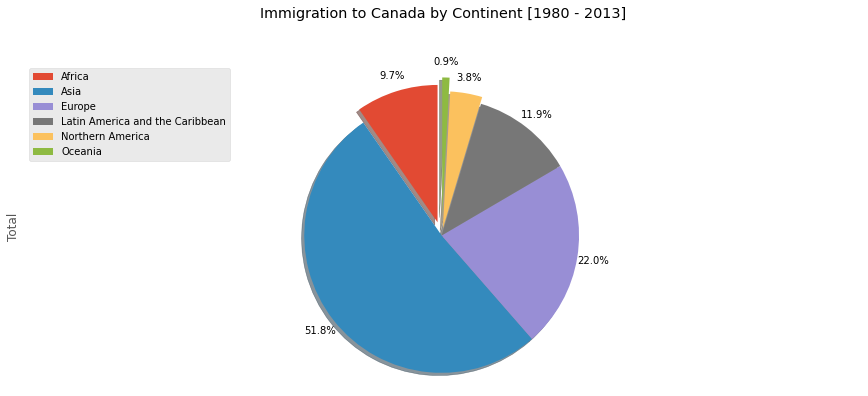

In [34]:
# percantik pie chart
pie_continent = s_total_continent.plot(kind='pie',
                                      figsize=(15,6),
                                      autopct='%1.1f%%',
                                      pctdistance=1.12,
                                      explode=[0.1,0,0,0,0.05,0.15],
                                      startangle=90,
                                      labels=None,
                                      shadow=True)

#tambah judul
pie_continent.set_title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)

# tambah legend
pie_continent.legend(labels=s_total_continent.index, loc="upper left")

# buat legend tidak numpuk ke chart
pie_continent.axis('equal')

# Box plot
cara cepat melihat secara visual summary statistik datanya. median, q1, q3, outliers, dan besaran inter-quartile range.

### buat boxplot data imigrasi iceland

<AxesSubplot:>

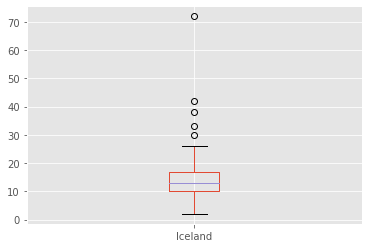

In [35]:
df_ice = df_can.loc[['Iceland'], years].T
df_ice.plot(kind='box')

In [36]:
# untuk lihat angka2 garis boxplot, pakai describe untuk dataframe
df_ice.describe()

Country,Iceland
count,34.000000
mean,16.764706
std,13.558088
min,2.000000
25%,10.000000
50%,13.000000
75%,17.000000
max,72.000000


<AxesSubplot:>

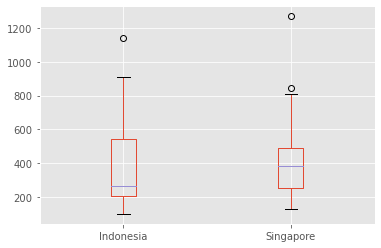

In [37]:
# bisa boxplot beberapa kolom juga, misalkan kita buat boxplot Indo dan Sg
df_insg.plot(kind='box')

In [38]:
df_insg.describe()

Country,Indonesia,Singapore
count,34.000000,34.000000
mean,386.764706,428.794118
std,251.233449,250.619086
min,100.000000,128.000000
25%,207.000000,252.500000
50%,266.000000,383.000000
75%,545.250000,487.500000
max,1138.000000,1269.000000


<AxesSubplot:>

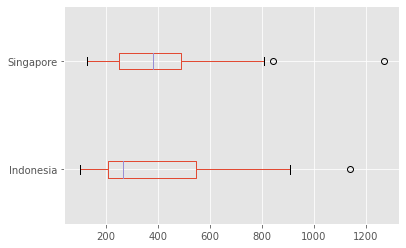

In [39]:
# ada juga boxplot horizontal
df_insg.plot(kind='box', vert=False)

Text(0, 0.5, 'Negara')

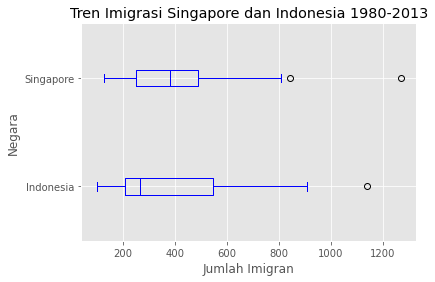

In [40]:
# opsi warna, text, anotasi, judul, label axis
df_insg.plot(kind='box', vert=False, color='b')
plt.title("Tren Imigrasi Singapore dan Indonesia 1980-2013")
plt.xlabel("Jumlah Imigran")
plt.ylabel("Negara")

sampai sini chart2 hampir mirip (line, area, bar), pie agak beda, boxplot beda lagi, histogram sama sekali berbeda walaupun secara visual mirip bar

# Histogram
histogram lebih mirip pie chart dan boxplot daripada bar chart. Karena histogram plot nya summary frequency.   
Histogram menunjukkan frekuensi sebuah kejadian terjadi.   

Misalkan, berapa kali Indonesia kirim 100-200 orang ke Canada selama 33 tahun terakhir? ini contoh pertanyaan yang di visualisasikan histogram.

In [41]:
# frekuensi Indonesia kirim berapa banyak imigran di tahun 1980-2013
df_indo = df_can.loc[['Indonesia'], years].T
df_indo.head()

Country,Indonesia
1980,186
1981,178
1982,252
1983,115
1984,123


<AxesSubplot:ylabel='Frequency'>

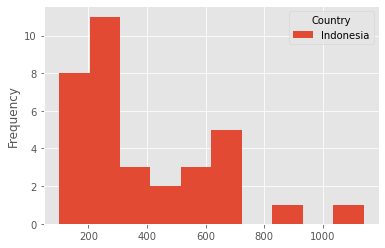

In [42]:
df_indo.plot(kind="hist")

marker x-axis nya tidak pas dengan ukuran bin histogram kita. jadi kita perlu edit markernya itu.   
untuk bisa edit, kita perlu hitung dulu, yang pas marker nya di titik mana saja

In [43]:
# pakai bantuan numpy
count, bin_edges = np.histogram(df_indo)
print(count, len(count))
print(bin_edges, len(bin_edges))

[ 8 11  3  2  3  5  0  1  0  1] 10
[ 100.   203.8  307.6  411.4  515.2  619.   722.8  826.6  930.4 1034.2
 1138. ] 11


<AxesSubplot:ylabel='Frequency'>

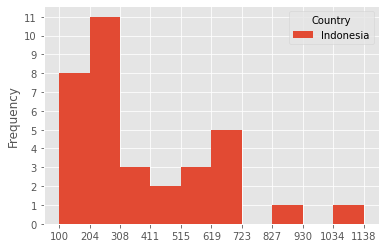

In [44]:
# buat custom marker x-axis biar pas dengan bin
df_indo.plot(kind="hist", xticks=bin_edges, yticks=range(12))

kalau dari histogram diatas, kita bisa bilang kalau Indonesia paling sering kirim antara 204-308 orang ke Canada per tahunnya. Sudah 11 kali dari 33 tahun data kita, Indonesia mengirim antara 204-308 orang.

bisa kita custom juga jumlah bin nya. misalkan mau lihat frekuensi untuk 50 per bin

[4 4 7 4 0 3 0 2 2 1 3 2 0 0 0 1 0 0 0 1] 20
[ 100.   151.9  203.8  255.7  307.6  359.5  411.4  463.3  515.2  567.1
  619.   670.9  722.8  774.7  826.6  878.5  930.4  982.3 1034.2 1086.1
 1138. ] 21


<AxesSubplot:ylabel='Frequency'>

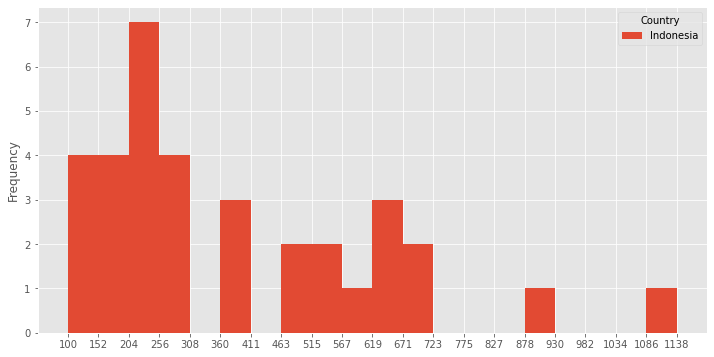

In [45]:
# variable untuk jumlah bin
n = 20

# pakai bantuan numpy untuk hitung pembatas bin nya
count, bin_edges = np.histogram(df_indo, n)
print(count, len(count))
print(bin_edges, len(bin_edges))

# tambahkan opsi bins dengan jumlah bins yang diinginkan untuk buat plot nya
df_indo.plot(kind="hist", 
             bins=n, 
             xticks=bin_edges, 
             yticks=range(8),
             figsize=(12,6))

kalau ukuran binnya sekitar 50 (52 pastinya), kita bisa membuat konklusi kalau Indonesia paling sering mengirim antara 204-256 imigran ke Canada setiap tahunnya. Sudah 7 kali terjadi dari 33 tahun (1980-2013) data kita.

[ 8  8 11  5  8  5  4  3  2  4  4  0  3  1  0  0  0  1  0  1] 20
[ 100.    158.45  216.9   275.35  333.8   392.25  450.7   509.15  567.6
  626.05  684.5   742.95  801.4   859.85  918.3   976.75 1035.2  1093.65
 1152.1  1210.55 1269.  ] 21


Text(0.5, 0, 'Jumlah Imigran')

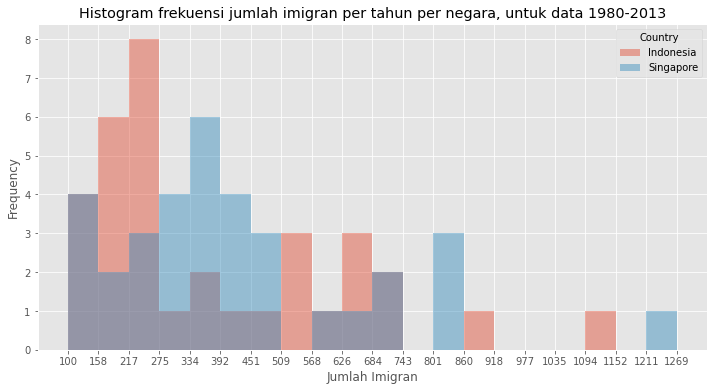

In [46]:
# Histogram juga bisa untuk lebih dari 1 kolom, misalkan kita gunakan df_insg Indo dan Sg

# variable untuk jumlah bin
n = 20

# pakai bantuan numpy untuk hitung pembatas bin nya
count, bin_edges = np.histogram(df_insg, n)
print(count, len(count))
print(bin_edges, len(bin_edges))

# tambahkan opsi bins dengan jumlah bins yang diinginkan untuk buat plot nya
df_insg.plot(kind="hist", 
             bins=n, 
             xticks=bin_edges, 
             yticks=range(9),
             figsize=(12,6),
             alpha = 0.45
            )

# tambah title, label axis
plt.title("Histogram frekuensi jumlah imigran per tahun per negara, untuk data 1980-2013")
plt.xlabel("Jumlah Imigran")

# Scatter Plot
scatter plot adalah plot yang digunakan untuk melihat korelasi antara 2 set data.   

misal kita punya data 10 orang punya berat dan tinggi badan. kita mau tau, adakah korelasi antara tinggi dan berat badan seseorang. apakah orang lebih tinggi pasti lebih berat? atau lebih tinggu justru semakin enteng? atau tidak ada hubungannya. kita bisa lihat secara visual korelasi antara 2 set data ini dengan scatter plot.

### apakah ada korelasi antara jumlah imigran Singapore dan Indonesia untuk tahun 2008-2013?

In [47]:
df_insg.head()

Country,Indonesia,Singapore
1980,186,241
1981,178,301
1982,252,337
1983,115,169
1984,123,128


<AxesSubplot:xlabel='Indonesia', ylabel='Singapore'>

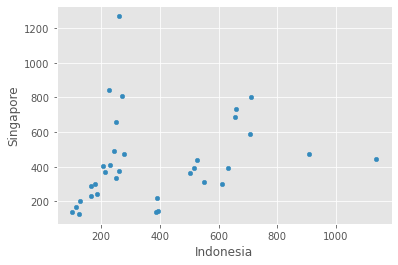

In [48]:
df_insg.plot(kind='scatter', x='Indonesia', y='Singapore')

In [ ]:
# scatter plot menunjukkan ada sedikit korelasi positif

<AxesSubplot:>

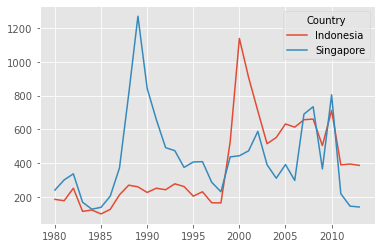

In [49]:
df_insg.plot()

# Menggabungkan beberapa plot ke satu gambar
menggunakan figure dan subplots

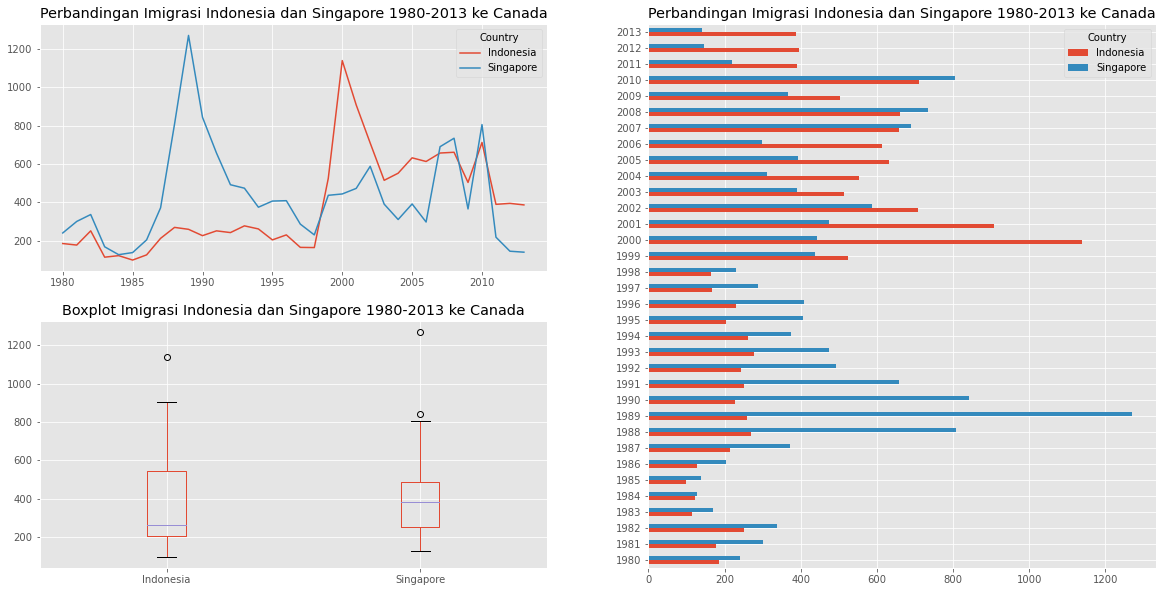

In [50]:
fig = plt.figure() # create figure
ax1 = fig.add_subplot(2, 2, 1) # create subplots
ax2 = fig.add_subplot(1, 2, 2) # create subplots
ax3 = fig.add_subplot(2, 2, 3) # create subplots

# misalkan untuk data imigrasi indonesia dan singapore, kita mau bandingkan:
# 1 - line plot
p1 = df_insg.plot(ax=ax1, figsize=(20,10))
p1.set_title("Perbandingan Imigrasi Indonesia dan Singapore 1980-2013 ke Canada")

# 2 - vertical bar plot
p2 = df_insg.plot(kind='barh', ax=ax2)
p2.set_title("Perbandingan Imigrasi Indonesia dan Singapore 1980-2013 ke Canada")

# 3 - box plot
p3 = df_insg.plot(kind='box', ax=ax3)
p3.set_title("Boxplot Imigrasi Indonesia dan Singapore 1980-2013 ke Canada")

#kasih judul
plt.show()